## Financial Report

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

Use the datasets provided to answer the following three questions:
* Which company type has the lowest profitability ratio?
* Which company type has the highest leverage ratio?
* What is the relationship between leverage and profitability in the real estate companies? Is it positive, negative, or no relationship?


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns


balance = pd.read_excel('data/Balance_Sheet.xlsx')
income = pd.read_excel('data/Income_Statement.xlsx')

In [31]:
df_ratios = balance.merge(income, on = ['company', 'Year', 'comp_type'])
# margin ratio
df_ratios['profitability_ratio'] = (df_ratios['Total Revenue'] - df_ratios['Cost Of Goods Sold']) / df_ratios['Total Revenue']

# debt-to-equity ratio
df_ratios['leverage_ratio'] = df_ratios['Total Liab'] / df_ratios['Total Stockholder Equity']

df_ratios.pivot_table(index = 'comp_type', values = 'profitability_ratio')

,profitability_ratio
comp_type,
fmcg,0.514396
real_est,0.534848
tech,0.572062


In [32]:
lowest_profitability = 'fmcg'

In [33]:
df_ratios.pivot_table(index = 'comp_type', values = 'leverage_ratio')

,leverage_ratio
comp_type,
fmcg,2.997896
real_est,5.692041
tech,1.777448


In [34]:
highest_leverage = 'real_est'

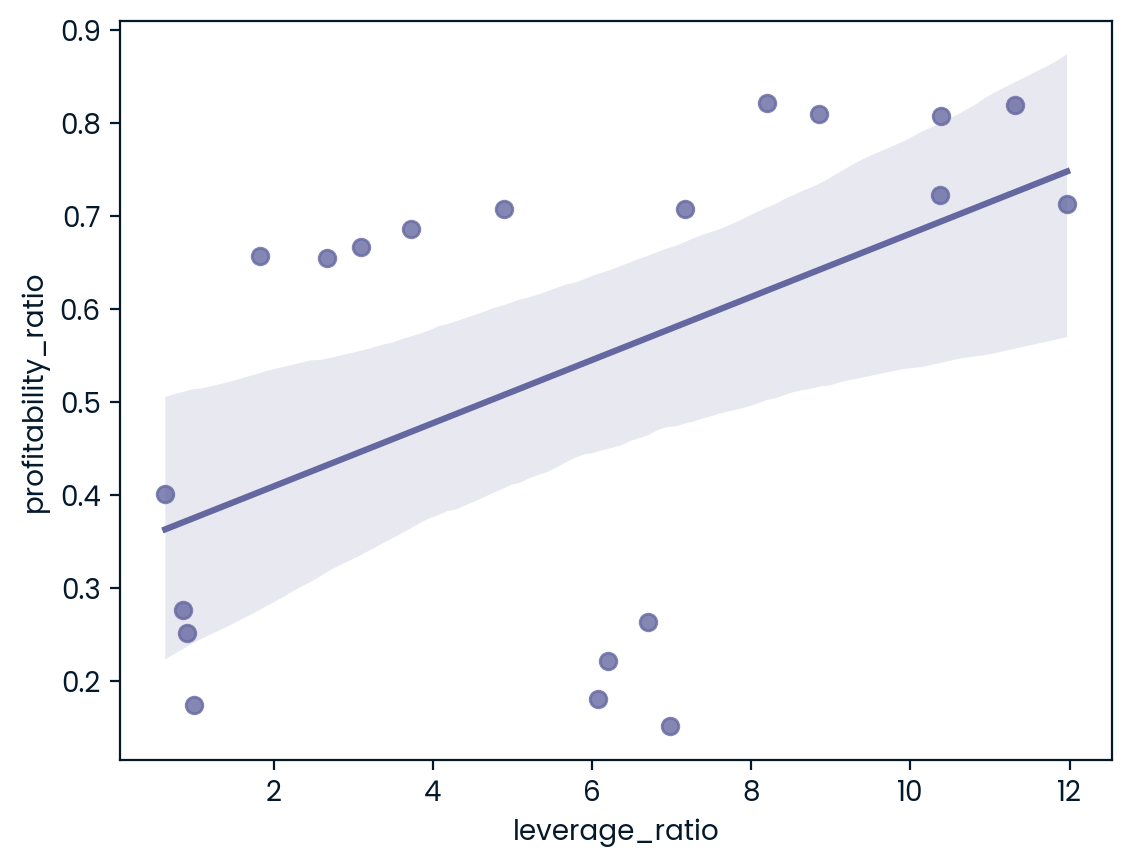

In [35]:
df_real_est = df_ratios[df_ratios['comp_type'] == 'real_est']
plot = sns.regplot(data = df_real_est, x = 'leverage_ratio', y = 'profitability_ratio')
relationship = 'positive'